In [100]:
# Importing the data from the library and split it into training and testing dataset
# The data comes as tuples to be unpacked for training and testing.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [101]:
# Split the training set into train and development sets

x_dev,y_dev = x_train[40000:],y_train[40000:]
x_train,y_train = x_train[:40000],y_train[:40000]

In [104]:
# See how many values each set has.
print(f'X training set - {len(x_train)} values')
print(f'Y training set - {len(y_train)} values')
print(f'X development set - {len(x_dev)} values')
print(f'Y development set - {len(y_dev)} values')
print(f'X test set - {len(x_test)} values')
print(f'Y test set - {len(y_test)} values')

X training set - 40000 values
Y training set - 40000 values
X development set - 20000 values
Y development set - 20000 values
X test set - 10000 values
Y test set - 10000 values


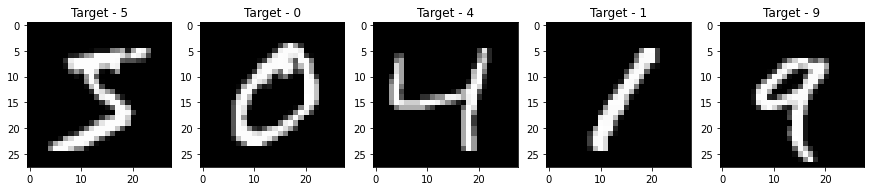

In [105]:
# visaulise the first 5 values of the x_training set and their target values
fig,ax = plt.subplots(1,5,figsize=(15, 15))
for i in range(5): 
    ax[i].imshow(x_train[i], cmap=plt.cm.gray)
    ax[i].title.set_text(f'Target - {y_train[i]}')

Each value of the X sets is a 28 x 28 matrix that contains the pixel greyscale value from 0 to 255
The Y sets are an array that contains the numerical value of the  number the image.

In [137]:
# Reshape each set in order to be prepared for machine learning
x_train = x_train.reshape(40000,-1)
y_train = y_train.reshape(40000,-1)
x_dev = x_dev.reshape(20000,-1)
y_dev = y_dev.reshape(20000,-1)
x_test = x_test.reshape(10000,-1)
y_test = y_test.reshape(10000,-1)

In [167]:
# Using a for loop we  test 8 different values for the n_estimator parameter to see which one performs the best
# Create a list to store all the scores
scores = []

for i in range(50,121,10):
    # Define the clasiffier using Random Forest
    forest = RandomForestClassifier(n_estimators=i, random_state=7)
    
    # Fit the model to the training data
    forest.fit(x_train,y_train.ravel())
    
    # Get the accuracy score from the fitted model
    score = forest.score(x_dev, y_dev)
    print(f"Accuracy with n_estimator={i} : {score}")
    scores.append(score)

Accuracy with n_estimator=50 : 0.96445
Accuracy with n_estimator=60 : 0.9653
Accuracy with n_estimator=70 : 0.966
Accuracy with n_estimator=80 : 0.9657
Accuracy with n_estimator=90 : 0.96595
Accuracy with n_estimator=100 : 0.96605
Accuracy with n_estimator=110 : 0.9661
Accuracy with n_estimator=120 : 0.96615


Text(0.5, 0, 'Accuracy Score')

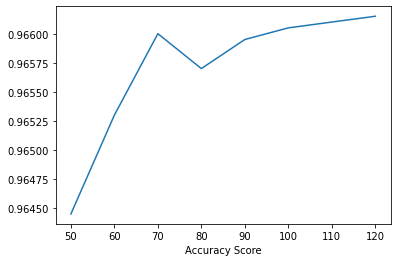

In [174]:
plt.plot(np.arange(50,121,10),scores)
plt.xlabel("N_Estimators")
plt.xlabel("Accuracy Score")

We see that  by tuning the n_estimator parameter to the value of 120 we obtained a better score then the other values.

In [180]:
# Get the max_depth of each tree from the random forest
max_depth_count = [estimator.tree_.max_depth for estimator in forest.estimators_]

# See the min and max values of the max depths
minDepth = min(max_depth_count)
maxDepth = max(max_depth_count)
print(f'MIN - {minDepth}\nMAX - {maxDepth}')

MIN - 25
MAX - 43


In [182]:
# Using the n_estimator as 120 , we can retrain the model , and we can use the same method  by testing on different max_depths.
scores2 = []

for i in range(minDepth,maxDepth+1,2):
    # Define the clasiffier using Random Forest
    forest = RandomForestClassifier(n_estimators=120,max_depth=i, random_state=7)
    
    # Fit the model to the training data
    forest.fit(x_train,y_train.ravel())
    
    # Get the accuracy score from the fitted model
    score = forest.score(x_dev, y_dev)
    print(f"Accuracy at max_depth={i} : {score}")
    scores2.append(score)

Accuracy at max_depth=25 : 0.9661
Accuracy at max_depth=27 : 0.9672
Accuracy at max_depth=29 : 0.9665
Accuracy at max_depth=31 : 0.96695
Accuracy at max_depth=33 : 0.96695
Accuracy at max_depth=35 : 0.96655
Accuracy at max_depth=37 : 0.96625
Accuracy at max_depth=39 : 0.9662
Accuracy at max_depth=41 : 0.9662
Accuracy at max_depth=43 : 0.96615


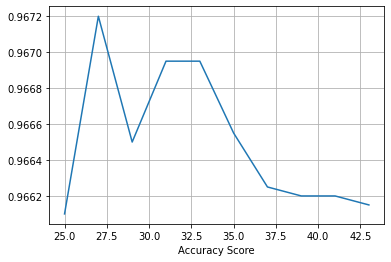

In [184]:
plt.plot(np.arange(minDepth,maxDepth+1,2),scores2)
plt.xlabel("Max_Depth")
plt.xlabel("Accuracy Score")
plt.grid()

By tuning the max_depth parameter aswell the model obteined at depth 27 a better accuracy then before ok 96.7%

In [185]:
# Create a Random Forest classifier using the best values discovered to obtain the final model
forest = RandomForestClassifier(n_estimators=100,max_depth=27, random_state=7)

In [186]:
# fit the classfier to the training data
forest.fit(x_train,y_train.ravel())

RandomForestClassifier(max_depth=27, random_state=7)

In [192]:
# Use the model to predict the test set
forest_predict = forest.predict(x_test)

<AxesSubplot:>

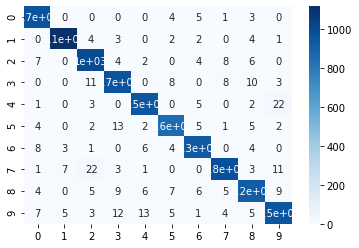

In [199]:
# Create the confusion matrix for the model
conf_mat = confusion_matrix(y_test, forest_predict)
cm_df = pd.DataFrame(conf_mat)

sns.heatmap(cm_df,annot=True,cmap="Blues")

In [202]:
# Show the  accuracy of the model
print(f'Accuracy of final model: {round(accuracy_score(y_test, forest_predict)*100,1)}%')

Accuracy of final model: 96.5%


In [212]:
# Calcualte the average f1 score
av_f1 = f1_score(y_test, forest_predict, average='micro')
print(f'Average F1_score : {av_f1}')

classes = [0,1,2,3,4,5,6,7,8,9]

# f1 score per class
f = f1_score(y_test, forest_predict, average=None)
lowest_score = min(f)

# Get the hardest to predict class
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

Average F1_score : 0.9653
Hardest class: 9


In [218]:
# Show the  clasification report that contains teh precision , recal, f1 score and support for each class

print(metrics.classification_report(y_test,forest_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# precision, recal, and f1